**AI project**


preprocessing part

In [ ]:
import numpy as np # for numerical operations
import pandas as pd # for handling input data
import matplotlib.pyplot as plt # for data visualization 
import seaborn as sns # for data visualization 
import statistics
import math
from sklearn import svm,linear_model
from sklearn import preprocessing,tree
from sklearn.model_selection import train_test_split
plt.style.use('seaborn-darkgrid')

In [ ]:
train = pd.read_csv('loan_data.csv')
print(f"Data has {train.shape[0]} Rows and {train.shape[1]} Features")


Data has 614 Rows and 13 Features


In [ ]:
train.info()
train.isnull().sum()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train["Gender"]=train["Gender"].replace({"Male":0,"Female":1})
train["Married"]=train["Married"].replace({"Yes":1,"No":0})
train["Education"]=train["Education"].replace({"Graduate":1,"Not Graduate":0})
train["Self_Employed"]=train["Self_Employed"].replace({"Yes":1,"No":0})
train["Loan_Status"]=train["Loan_Status"].replace({"Y":1,"N":0})
train["Dependents"]=train["Dependents"].replace({"0":0})
train["Dependents"]=train["Dependents"].replace({"1":1})
train["Dependents"]=train["Dependents"].replace({"2":2})
train["Dependents"]=train["Dependents"].replace({"3+":3})
#print(data['Gender'].unique())
#one_hot_encoded_data = pd.get_dummies(data, columns = ['Remarks', 'Gender'])

In [ ]:
#train["Gender"]=pd.to_numeric(train["Gender"])
#train["Dependents"].map({"0":0,"1":1,"3+":3}).astype(int)

In [ ]:
train=train.drop(columns=["Loan_ID"])

nesheel el nulls ba2a..

In [ ]:
train["Loan_Amount_Term"]=train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mean())
train["Dependents"]=train["Dependents"].fillna(train["Dependents"].mean())
train["Dependents"]=train["Dependents"].fillna(train["Credit_History"].mode())
train["Loan_Amount_Term"]=train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mean())
#
train["LoanAmount"]=train["LoanAmount"].fillna(train["LoanAmount"].mean())
train["Self_Employed"]=train["Self_Employed"].fillna(train["Self_Employed"].mean())
train["Married"]=train["Married"].fillna(0)#better with condition
train["Credit_History"]=train["Credit_History"].fillna(train["Credit_History"].mean())
train["Gender"]=train["Gender"].fillna(0)


one hot encoding

In [ ]:
print(train["Married"].mode())

0    1.0
dtype: float64


In [ ]:
encd = pd.get_dummies(train, columns = ['Property_Area'])

swappinng culumns

In [ ]:
lbl=train["Loan_Status"]
train=train.drop(columns=["Loan_Status"])
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,Urban
1,0.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,Rural
2,0.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,Urban
3,0.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,Urban
4,0.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,Urban


In [ ]:
train["Loan_Status"]=lbl
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,0.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,0.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,Urban,1
3,0.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,0.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [ ]:
#print(encd)
print(train.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [ ]:
train["Property_Area_Urban"]=encd["Property_Area_Urban"]
train["Property_Area_Rural"]=encd["Property_Area_Rural"]
train["Property_Area_Semiurban"]=encd["Property_Area_Semiurban"]

In [ ]:
train=train.drop(columns=["Property_Area"])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    float64
 1   Married                  614 non-null    float64
 2   Dependents               614 non-null    float64
 3   Education                614 non-null    int64  
 4   Self_Employed            614 non-null    float64
 5   ApplicantIncome          614 non-null    int64  
 6   CoapplicantIncome        614 non-null    float64
 7   LoanAmount               614 non-null    float64
 8   Loan_Amount_Term         614 non-null    float64
 9   Credit_History           614 non-null    float64
 10  Loan_Status              614 non-null    int64  
 11  Property_Area_Urban      614 non-null    uint8  
 12  Property_Area_Rural      614 non-null    uint8  
 13  Property_Area_Semiurban  614 non-null    uint8  
dtypes: float64(8), int64(3), u

Outliers removal 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


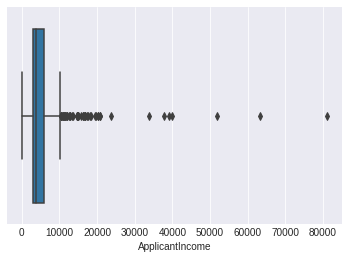

In [ ]:
sns.boxplot(train['ApplicantIncome'])

In [ ]:
mask = train['ApplicantIncome']<10000

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
print(np.where(train['ApplicantIncome']>10000))
train[mask]
train=train[mask]
#train["ApplicantIncome"]=train["ApplicantIncome"][:10000]
#print(train["ApplicantIncome"][1000])

(array([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
       146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
       324, 333, 369, 370, 409, 424, 432, 435, 438, 443, 467, 475, 478,
       483, 487, 493, 506, 509, 525, 533, 534, 557, 561, 572, 594, 604]),)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


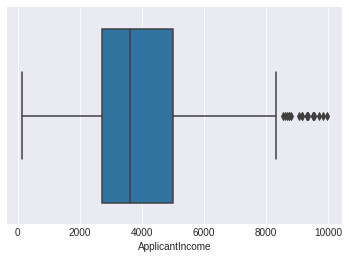

In [ ]:
sns.boxplot(train['ApplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


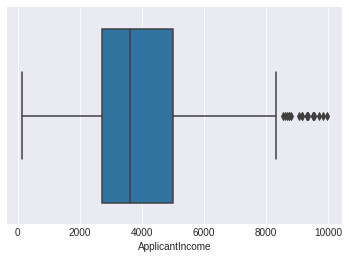

In [ ]:
# IQR
Q1 = np.percentile(train['ApplicantIncome'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(train['ApplicantIncome'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1
sns.boxplot(train['ApplicantIncome'])

**Normalization**

In [ ]:
#train["CoapplicantIncome"]=preprocessing.normalize(train["CoapplicantIncome"])
#df_norm = (df-df.min())/ (df.max() - df.min())
train["CoapplicantIncome"]=(train["CoapplicantIncome"]-train["CoapplicantIncome"].min())/(train["CoapplicantIncome"].max()-train["CoapplicantIncome"].min())
print(train["CoapplicantIncome"].max())

1.0


In [ ]:
#train["Loan_Amount_Term"]=(train["Loan_Amount_Term"]-train["Loan_Amount_Term"].min())/(train["Loan_Amount_Term"].max()-train["Loan_Amount_Term"].min())
trainnorm = (train - train.min())/ (train.max() - train.min())


In [ ]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Urban,Property_Area_Rural,Property_Area_Semiurban
0,0.0,0.0,0.0,1,0.0,5849,0.000000,146.412162,360.0,1.0,1,1,0,0
1,0.0,1.0,1.0,1,0.0,4583,0.036192,128.000000,360.0,1.0,0,0,1,0
2,0.0,1.0,0.0,1,1.0,3000,0.000000,66.000000,360.0,1.0,1,1,0,0
3,0.0,1.0,0.0,0,0.0,2583,0.056592,120.000000,360.0,1.0,1,1,0,0
4,0.0,0.0,0.0,1,0.0,6000,0.000000,141.000000,360.0,1.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.0,1,0.0,2900,0.000000,71.000000,360.0,1.0,1,0,1,0
610,0.0,1.0,3.0,1,0.0,4106,0.000000,40.000000,180.0,1.0,1,0,1,0
611,0.0,1.0,1.0,1,0.0,8072,0.005760,253.000000,360.0,1.0,1,1,0,0
612,0.0,1.0,2.0,1,0.0,7583,0.000000,187.000000,360.0,1.0,1,1,0,0


**Algorithms**

In [ ]:
from pandas.core.common import random_state
y=train["Loan_Status"]
x=train.iloc[:,:]
x=x.drop(columns=["Loan_Status"])
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

*SVM*

In [ ]:

support=svm.SVC()
support.fit(xtrain,ytrain)
print(support.score(xtrain,ytrain))

0.7058823529411765


Logistic *Regression*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
model = LogisticRegression()
model.fit(xtrain, ytrain)
yprd=model.predict(xtrain)
print(model.score(xtest,ytest))
print (confusion_matrix(ytrain,yprd))

0.7797619047619048
[[ 54  61]
 [  4 272]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


*ID3*

In [ ]:
dt=tree.DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
yprd=dt.predict(xtest)
print(dt.score(xtest,ytest))
print("Accuracy ",metrics.accuracy_score(ytest,yprd))

0.6726190476190477
Accuracy  0.6726190476190477


In [ ]:
ytest

554    0
447    0
70     1
371    1
256    0
      ..
322    1
59     1
160    1
63     0
6      1
Name: Loan_Status, Length: 168, dtype: int64

In [ ]:
#xtrain=xtrain.drop(columns=["Loan_Status"])
#xtest=xtest.drop(columns=["Loan_Status"])